In [2]:
# !pip install neuralprophet[live] # jupyter notebook 용

     |████████████████████████████████| 67 kB 2.0 MB/s 
     |████████████████████████████████| 172 kB 12.2 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [44]:
import os
import numpy as np
import pandas as pd

from neuralprophet import NeuralProphet, set_random_seed 
import neuralprophet

In [45]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2022
np.random.seed(random_seed)
set_random_seed(random_seed)

In [46]:
PATH = '/content/drive/MyDrive/Colab Notebooks/traffic forecasting/Project1/traffic forecasting'

In [47]:
train = pd.read_csv(f'{PATH}/data/train1.csv')
val = pd.read_csv(f'{PATH}/data/validate1.csv')
test = pd.read_csv(f'{PATH}/data/test.csv')
submission = pd.read_csv(f'{PATH}/data/prediction1.csv')

In [48]:
train = pd.concat([train, val.loc[168:]], ignore_index=True)

In [49]:
336/2

168.0

In [50]:
train

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247.0,19128.0,2611.0,5161.0,1588.0,892.0,32263.0,1636.0,7938.0,1894.0,14957.0,3527.0,11174.0,2930.0,8640.0,14175.0,2035.0,5231.0,18492.0,48520.0,15393.0,16628.0,8804.0,2790.0,38657.0,1311.0,3482.0,11299.0,7072.0,1176.0,3810.0,748.0,3920.0,2133.0,3799.0
1,20200101,1,89309.0,19027.0,3337.0,5502.0,1650.0,1043.0,35609.0,1644.0,9896.0,1967.0,14682.0,3420.0,13884.0,3062.0,8349.0,15654.0,2417.0,5483.0,15283.0,57904.0,15834.0,19785.0,8483.0,3381.0,45759.0,1162.0,3849.0,13180.0,8771.0,1283.0,3763.0,782.0,3483.0,2057.0,4010.0
2,20200101,2,66611.0,14710.0,2970.0,4631.0,1044.0,921.0,26821.0,1104.0,9343.0,1838.0,11120.0,3587.0,17141.0,3255.0,7025.0,12520.0,1859.0,5058.0,14327.0,53876.0,13866.0,24501.0,8167.0,2670.0,27425.0,768.0,2299.0,7986.0,5426.0,1536.0,3229.0,491.0,2634.0,1526.0,3388.0
3,20200101,3,53290.0,13753.0,2270.0,4242.0,1021.0,790.0,21322.0,909.0,10009.0,1630.0,9836.0,3842.0,20715.0,2661.0,7226.0,9821.0,1724.0,4863.0,12787.0,51615.0,13528.0,28695.0,9459.0,2325.0,18893.0,632.0,1716.0,5703.0,3156.0,1104.0,2882.0,431.0,2488.0,1268.0,3686.0
4,20200101,4,52095.0,17615.0,2406.0,3689.0,1840.0,922.0,22711.0,1354.0,15497.0,1264.0,10668.0,4559.0,28308.0,2894.0,8201.0,9038.0,960.0,5166.0,11479.0,47424.0,18156.0,26977.0,10944.0,3583.0,18135.0,875.0,2421.0,5816.0,2933.0,1206.0,2433.0,499.0,2952.0,1927.0,5608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,20200524,19,314226.0,98345.0,10625.0,28618.0,8316.0,6684.0,141675.0,6619.0,23535.0,8572.0,67748.0,16791.0,33325.0,19124.0,42183.0,63229.0,13163.0,35383.0,73188.0,100849.0,84286.0,26458.0,15572.0,10341.0,139827.0,8254.0,16118.0,23304.0,14082.0,8447.0,21694.0,2180.0,15746.0,10903.0,21014.0
3476,20200524,20,300001.0,87871.0,8226.0,22706.0,6981.0,5743.0,142933.0,6295.0,20953.0,7851.0,61609.0,14119.0,30216.0,18610.0,35556.0,59070.0,12788.0,30675.0,68255.0,95107.0,76441.0,24140.0,13340.0,8872.0,142469.0,5225.0,15297.0,21919.0,14526.0,7332.0,19732.0,1990.0,14096.0,10028.0,17787.0
3477,20200524,21,304150.0,71126.0,6002.0,18317.0,4939.0,3779.0,133110.0,4781.0,15242.0,6101.0,48336.0,11534.0,25710.0,15651.0,27467.0,53787.0,12019.0,26317.0,61169.0,86434.0,61136.0,21076.0,9317.0,6392.0,138816.0,4072.0,12685.0,21135.0,14403.0,5443.0,16967.0,1359.0,11670.0,7963.0,14041.0
3478,20200524,22,236751.0,44947.0,3575.0,11455.0,3135.0,2536.0,98582.0,3267.0,8849.0,4553.0,33607.0,8069.0,18293.0,9723.0,16602.0,38615.0,8703.0,17694.0,47609.0,58492.0,37501.0,12090.0,5901.0,3938.0,100767.0,2489.0,8093.0,14427.0,10914.0,3861.0,11397.0,859.0,7270.0,5194.0,8230.0


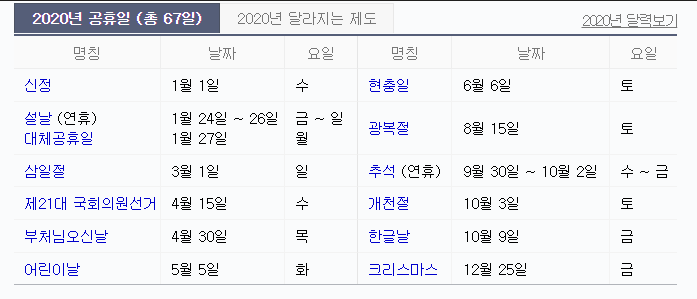

In [51]:
data = pd.DataFrame()
data['ds'] = pd.to_datetime(train['날짜'].astype('str') +'-' + train['시간'].astype('str'),format="%Y%m%d-%H")

In [52]:
train.columns[2:]

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [53]:
pred = pd.DataFrame(columns=['ds', 'y'])
pred['ds'] = pd.to_datetime(submission['timestamp'],format="%Y%m%d_%H")

In [54]:
pred

,ds,y
0,2020-05-25 00:00:00,NaN
1,2020-05-25 01:00:00,NaN
2,2020-05-25 02:00:00,NaN
3,2020-05-25 03:00:00,NaN
4,2020-05-25 04:00:00,NaN
...,...,...
163,2020-05-31 19:00:00,NaN
164,2020-05-31 20:00:00,NaN
165,2020-05-31 21:00:00,NaN
166,2020-05-31 22:00:00,NaN


In [55]:
for col in train.columns[2:]:
    data['y'] = train[col]
    m = NeuralProphet(epochs = 400, seasonality_reg = 0.5)
    m = m.add_country_holidays("KR")
    metrics = m.fit(data, freq="H")
    forecast = m.predict(pred)
    submission[col] = forecast['yhat1']

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.03E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.03E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 9.51E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.35E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.68it/s, SmoothL1Loss=0.0047, MAE=2.65e+4, RMSE=3.6e+4, RegLoss=0.000436]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.87E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.48E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.67it/s, SmoothL1Loss=0.00571, MAE=9.38e+3, RMSE=1.29e+4, RegLoss=0.000406]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.86E-01, min: 1.38E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.58E-01, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.08E-01, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.16E-01
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.68it/s, SmoothL1Loss=0.0119, MAE=1.51e+3, RMSE=2.23e+3, RegLoss=0.0004]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.73E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.22E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.0114, MAE=3.7e+3, RMSE=5.39e+3, RegLoss=0.000384]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.57E-01, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.35E-01, min: 9.51E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.35E-01, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.42E-01
Epoch[400/400]: 100%|██████████| 400/400 [01:27<00:00,  4.59it/s, SmoothL1Loss=0.00805, MAE=1.22e+3, RMSE=1.72e+3, RegLoss=0.000422]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.08E-01, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 8.19E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.61E-02, min: 9.51E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.61E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.66it/s, SmoothL1Loss=0.0108, MAE=1.03e+3, RMSE=1.47e+3, RegLoss=0.000403]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 7.04E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 8.19E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.38E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:27<00:00,  4.60it/s, SmoothL1Loss=0.00565, MAE=1.45e+4, RMSE=1.9e+4, RegLoss=0.000401]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.03E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 1.03E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.86E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.65it/s, SmoothL1Loss=0.00612, MAE=669, RMSE=923, RegLoss=0.000382]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 8.82E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 8.19E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 8.19E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.22E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.00846, MAE=2.74e+3, RMSE=3.63e+3, RegLoss=0.000407]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.38E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.96E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:27<00:00,  4.60it/s, SmoothL1Loss=0.00959, MAE=1.14e+3, RMSE=1.64e+3, RegLoss=0.000375]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 7.59E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 7.59E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.16E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.00613, MAE=7.29e+3, RMSE=9.91e+3, RegLoss=0.000403]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.41E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.35E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.66it/s, SmoothL1Loss=0.0102, MAE=2.49e+3, RMSE=3.52e+3, RegLoss=0.000358]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.61E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.91E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.62it/s, SmoothL1Loss=0.0109, MAE=4.35e+3, RMSE=6e+3, RegLoss=0.000351]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 9.51E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 9.51E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.86E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.62it/s, SmoothL1Loss=0.0101, MAE=2.75e+3, RMSE=3.76e+3, RegLoss=0.000388]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.01E-02, min: 6.53E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 8.19E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.50E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.62it/s, SmoothL1Loss=0.0114, MAE=5.77e+3, RMSE=8.16e+3, RegLoss=0.000391]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.73E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.24E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.24E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.68it/s, SmoothL1Loss=0.00594, MAE=6.49e+3, RMSE=8.59e+3, RegLoss=0.000417]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.41E-02, min: 1.61E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.87E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.67it/s, SmoothL1Loss=0.00582, MAE=1.27e+3, RMSE=1.59e+3, RegLoss=0.000408]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.28E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.87E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 2.17E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.84E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.00747, MAE=3.88e+3, RMSE=5.2e+3, RegLoss=0.000407]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 9.51E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.03E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.22E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.66it/s, SmoothL1Loss=0.00531, MAE=6.54e+3, RMSE=8.76e+3, RegLoss=0.000388]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.41E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.03E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.77E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.63it/s, SmoothL1Loss=0.00543, MAE=1.06e+4, RMSE=1.4e+4, RegLoss=0.0004]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 9.51E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.28E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.22E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.61it/s, SmoothL1Loss=0.0111, MAE=1.1e+4, RMSE=1.54e+4, RegLoss=0.000397]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.19E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.38E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.87E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.86E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.00966, MAE=4.43e+3, RMSE=5.67e+3, RegLoss=0.000475]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.19E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 2.72E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.37E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.61it/s, SmoothL1Loss=0.00999, MAE=2.75e+3, RMSE=3.78e+3, RegLoss=0.000423]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 1.19E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-02, min: 9.51E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.96E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.63it/s, SmoothL1Loss=0.0101, MAE=1.34e+3, RMSE=1.91e+3, RegLoss=0.000388]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.19E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.50E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.77E-02, min: 1.28E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.58E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:25<00:00,  4.66it/s, SmoothL1Loss=0.00614, MAE=1.38e+4, RMSE=1.92e+4, RegLoss=0.000491]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.38E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.60E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.0104, MAE=1.12e+3, RMSE=1.6e+3, RegLoss=0.000441]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.37E-02, min: 7.59E-01


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 2.02E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.06E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.61it/s, SmoothL1Loss=0.00555, MAE=1.3e+3, RMSE=1.85e+3, RegLoss=0.00047]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.87E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 2.17E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.91E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:27<00:00,  4.56it/s, SmoothL1Loss=0.0076, MAE=4.15e+3, RMSE=5.75e+3, RegLoss=0.000491]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.72E-02, min: 1.19E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.91E-02, min: 1.38E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.09E-02, min: 1.28E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.22E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:27<00:00,  4.58it/s, SmoothL1Loss=0.00698, MAE=1.92e+3, RMSE=2.65e+3, RegLoss=0.000512]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.03E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.48E-02, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.91E-02
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.61it/s, SmoothL1Loss=0.0155, MAE=1.39e+3, RMSE=2.01e+3, RegLoss=0.000405]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.69E-01, min: 1.11E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.57E-01, min: 1.73E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.08E-01, min: 1.11E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.42E-01
Epoch[400/400]: 100%|██████████| 400/400 [01:26<00:00,  4.64it/s, SmoothL1Loss=0.00741, MAE=2.69e+3, RMSE=3.6e+3, RegLoss=0.000406]
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 1.49E+00


  0%|          | 0/277 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.98E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.98E-02
Epoch[3/400]:   1%|          | 3/400 [00:00<01:45,  3.77it/s, SmoothL1Loss=1.86, MAE=1.37e+4, RMSE=1.56e+4, RegLoss=0]


KeyboardInterrupt: ignored

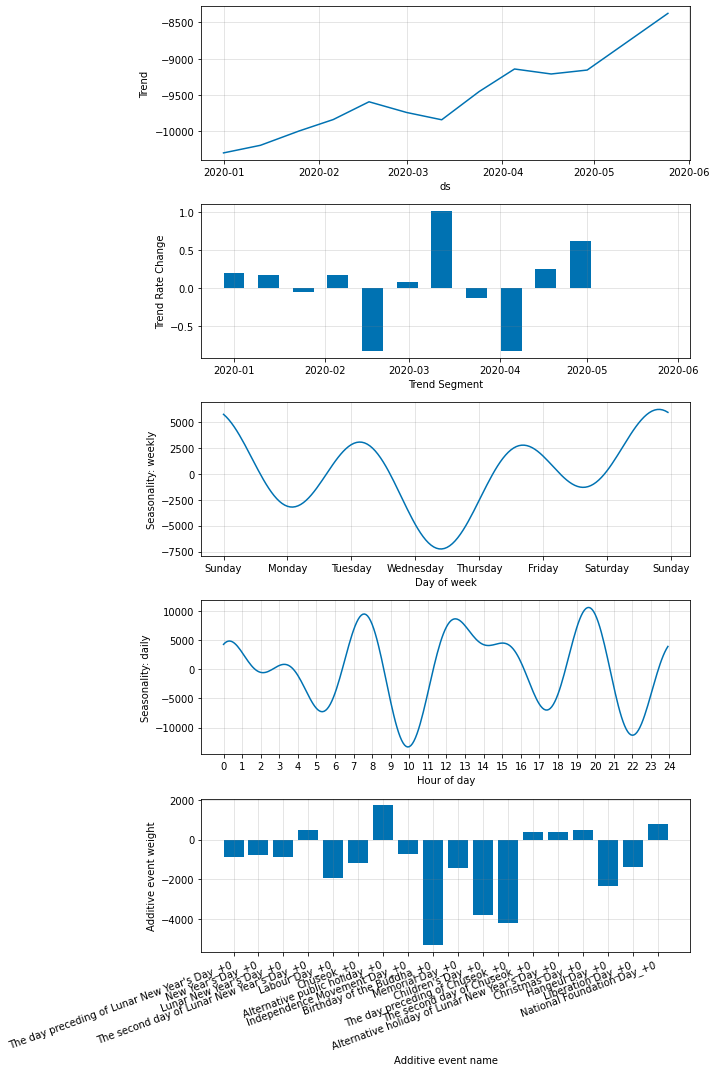

In [56]:
fig_model = m.plot_parameters()

In [57]:
submission

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,81646.328125,17587.437500,1153.413818,6320.238770,1025.889526,1147.855225,32390.005859,1219.242310,4702.297363,1587.132446,13022.975586,1911.504395,8413.599609,3509.801270,7080.483398,10044.205078,3676.895996,7555.850098,22138.236328,14760.929688,12889.982422,4045.345215,1543.947144,1431.786499,28479.435547,615.644897,3434.274170,-1193.117920,3880.991943,1748.649170,4789.233398,0.000000,2801.040039,1877.159424,2869.209473
1,20200525_1,64749.847656,14409.796875,961.802673,5415.987793,820.444275,968.160034,25655.537109,978.012573,4170.283203,1322.763672,10012.549805,1287.914673,6927.073242,2955.447510,5497.990234,8032.141113,3337.678955,7079.925781,17486.503906,10692.430664,10591.872070,2924.611816,889.416870,1302.529541,21632.029297,450.084351,3016.185303,-2266.282471,2771.208984,1444.506470,4051.362305,0.000000,2558.268555,1717.546021,2567.486328
2,20200525_2,59215.285156,15082.185547,1066.616455,5221.125000,987.608276,1037.874512,21641.605469,948.206177,4069.979980,1515.371826,9757.428711,1313.017578,6529.160645,2964.759033,5204.230957,7554.039551,3105.145752,7508.022949,15151.415039,8983.671875,10883.123047,2284.444092,742.363586,1461.043579,17548.013672,775.514465,2981.774658,-2912.247559,2141.330566,1287.754150,4235.022461,0.000000,3329.571289,2046.073975,3128.912598
3,20200525_3,52810.050781,14661.159180,827.925781,5056.154297,653.862183,905.632507,18972.886719,852.186646,3666.804443,1653.542114,8521.210938,1275.494141,6567.522949,2695.323975,4759.411133,6584.971191,2905.342773,7633.210449,14904.936523,7879.900879,9806.824219,1755.542114,495.479218,1263.380493,13715.322266,568.073853,2558.999023,-3749.064941,1536.898560,1146.430420,4107.927734,0.000000,3077.631104,1805.022461,2885.020996
4,20200525_4,69387.156250,18741.310547,934.171387,5783.362305,562.414429,892.777222,28371.789062,1039.873047,3745.127197,1853.698608,9192.200195,1864.399414,7642.589355,2949.125000,5267.600586,9493.902344,3891.725830,9800.176758,18701.566406,16124.159180,10745.588867,1678.835205,474.296356,1526.416992,28824.986328,297.624451,3431.515381,122.149170,3296.044189,1266.203125,4345.551758,0.000000,3099.426270,2015.385498,3365.340576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,275149.437500,81664.406250,7645.124512,22368.162109,8072.139160,5975.059082,116855.328125,5440.533203,16935.078125,6952.179199,57779.988281,11932.763672,25192.839844,15160.731445,31142.050781,47563.437500,11123.091797,27196.371094,59817.691406,82057.085938,62776.332031,17590.740234,11147.577148,7424.802246,137366.968750,6087.513672,14114.334961,21533.685547,16701.136719,5948.324219,18858.214844,2479.615723,16635.179688,9865.623047,17537.255859
164,20200531_20,236703.515625,62106.195312,4980.925781,16598.494141,5217.964355,3928.626465,99243.882812,4127.640137,12844.137695,5295.503906,44760.625000,8770.866211,20750.880859,11348.910156,23405.177734,37719.207031,9458.238281,20944.574219,52463.003906,65378.066406,46610.363281,14247.607422,7464.185547,5063.506348,117851.750000,3843.098633,11682.131836,15012.412109,14292.512695,4778.128906,14375.355469,1240.958740,11699.166992,6763.162598,12029.878906
165,20200531_21,210659.093750,48696.429688,3516.346191,12761.352539,3802.922852,2758.406250,83869.828125,3293.395020,10091.995117,4129.213867,35502.562500,6594.298340,17339.419922,8557.724609,17816.371094,29821.943359,8057.569336,16802.023438,45722.281250,51587.085938,35271.449219,11037.325195,5140.937012,3811.149414,100932.875000,2562.624512,9718.211914,10577.106445,12527.073242,3740.211182,11481.412109,595.458435,8650.968750,5242.015625,8799.581055
166,20200531_22,174071.828125,38313.242188,2635.085938,10145.502930,3039.263184,2154.042725,64958.156250,2613.391846,8029.272949,3175.175781,27738

In [58]:
submission.columns[1:]

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [59]:
for col in submission.columns[1:]:
    submission.loc[submission[col] < 0, col] = 0# 마이너스 값 0으로 변경

In [60]:
submission

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,81646.328125,17587.437500,1153.413818,6320.238770,1025.889526,1147.855225,32390.005859,1219.242310,4702.297363,1587.132446,13022.975586,1911.504395,8413.599609,3509.801270,7080.483398,10044.205078,3676.895996,7555.850098,22138.236328,14760.929688,12889.982422,4045.345215,1543.947144,1431.786499,28479.435547,615.644897,3434.274170,0.000000,3880.991943,1748.649170,4789.233398,0.000000,2801.040039,1877.159424,2869.209473
1,20200525_1,64749.847656,14409.796875,961.802673,5415.987793,820.444275,968.160034,25655.537109,978.012573,4170.283203,1322.763672,10012.549805,1287.914673,6927.073242,2955.447510,5497.990234,8032.141113,3337.678955,7079.925781,17486.503906,10692.430664,10591.872070,2924.611816,889.416870,1302.529541,21632.029297,450.084351,3016.185303,0.000000,2771.208984,1444.506470,4051.362305,0.000000,2558.268555,1717.546021,2567.486328
2,20200525_2,59215.285156,15082.185547,1066.616455,5221.125000,987.608276,1037.874512,21641.605469,948.206177,4069.979980,1515.371826,9757.428711,1313.017578,6529.160645,2964.759033,5204.230957,7554.039551,3105.145752,7508.022949,15151.415039,8983.671875,10883.123047,2284.444092,742.363586,1461.043579,17548.013672,775.514465,2981.774658,0.000000,2141.330566,1287.754150,4235.022461,0.000000,3329.571289,2046.073975,3128.912598
3,20200525_3,52810.050781,14661.159180,827.925781,5056.154297,653.862183,905.632507,18972.886719,852.186646,3666.804443,1653.542114,8521.210938,1275.494141,6567.522949,2695.323975,4759.411133,6584.971191,2905.342773,7633.210449,14904.936523,7879.900879,9806.824219,1755.542114,495.479218,1263.380493,13715.322266,568.073853,2558.999023,0.000000,1536.898560,1146.430420,4107.927734,0.000000,3077.631104,1805.022461,2885.020996
4,20200525_4,69387.156250,18741.310547,934.171387,5783.362305,562.414429,892.777222,28371.789062,1039.873047,3745.127197,1853.698608,9192.200195,1864.399414,7642.589355,2949.125000,5267.600586,9493.902344,3891.725830,9800.176758,18701.566406,16124.159180,10745.588867,1678.835205,474.296356,1526.416992,28824.986328,297.624451,3431.515381,122.149170,3296.044189,1266.203125,4345.551758,0.000000,3099.426270,2015.385498,3365.340576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,275149.437500,81664.406250,7645.124512,22368.162109,8072.139160,5975.059082,116855.328125,5440.533203,16935.078125,6952.179199,57779.988281,11932.763672,25192.839844,15160.731445,31142.050781,47563.437500,11123.091797,27196.371094,59817.691406,82057.085938,62776.332031,17590.740234,11147.577148,7424.802246,137366.968750,6087.513672,14114.334961,21533.685547,16701.136719,5948.324219,18858.214844,2479.615723,16635.179688,9865.623047,17537.255859
164,20200531_20,236703.515625,62106.195312,4980.925781,16598.494141,5217.964355,3928.626465,99243.882812,4127.640137,12844.137695,5295.503906,44760.625000,8770.866211,20750.880859,11348.910156,23405.177734,37719.207031,9458.238281,20944.574219,52463.003906,65378.066406,46610.363281,14247.607422,7464.185547,5063.506348,117851.750000,3843.098633,11682.131836,15012.412109,14292.512695,4778.128906,14375.355469,1240.958740,11699.166992,6763.162598,12029.878906
165,20200531_21,210659.093750,48696.429688,3516.346191,12761.352539,3802.922852,2758.406250,83869.828125,3293.395020,10091.995117,4129.213867,35502.562500,6594.298340,17339.419922,8557.724609,17816.371094,29821.943359,8057.569336,16802.023438,45722.281250,51587.085938,35271.449219,11037.325195,5140.937012,3811.149414,100932.875000,2562.624512,9718.211914,10577.106445,12527.073242,3740.211182,11481.412109,595.458435,8650.968750,5242.015625,8799.581055
166,20200531_22,174071.828125,38313.242188,2635.085938,10145.502930,3039.263184,2154.042725,64958.156250,2613.391846,8029.272949,3175.175781,27738.957031,4575.332

In [61]:
submission.to_csv('prediction.csv', index=False)